In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Invistico_Airline.csv')
df.sample(6)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
12817,dissatisfied,Male,Loyal Customer,37,Personal Travel,Eco,1297,2,4,2,...,1,1,3,3,5,3,4,1,0,0.0
30843,dissatisfied,Female,Loyal Customer,31,Personal Travel,Eco,4117,3,5,3,...,2,3,4,4,5,2,3,2,27,38.0
10569,satisfied,Female,Loyal Customer,16,Personal Travel,Eco,2409,3,3,3,...,4,4,4,4,4,5,4,3,1,4.0
5787,satisfied,Female,Loyal Customer,28,Personal Travel,Eco,2474,2,5,5,...,1,2,2,2,2,4,2,4,0,0.0
25160,satisfied,Female,Loyal Customer,30,Personal Travel,Eco,2336,4,4,4,...,4,5,5,5,5,5,5,4,0,9.0
25946,satisfied,Female,Loyal Customer,55,Personal Travel,Eco,1012,2,2,2,...,5,5,5,5,5,4,5,5,8,2.0


In [3]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [4]:
df=df.drop_duplicates()

In [5]:
df.shape

(129880, 23)

In [6]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

# Summarizing Data

In [8]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


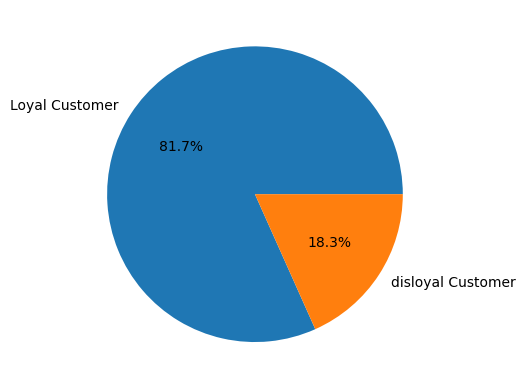

In [9]:
plt.pie(df['Customer Type'].value_counts(),autopct='%1.1f%%',labels=list(df['Customer Type'].unique()))
plt.show()

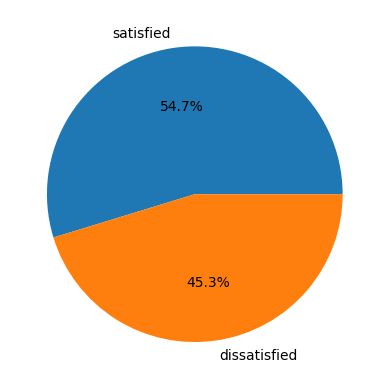

In [10]:
plt.pie(df['satisfaction'].value_counts(),autopct='%1.1f%%',labels=df['satisfaction'].unique())
plt.show()

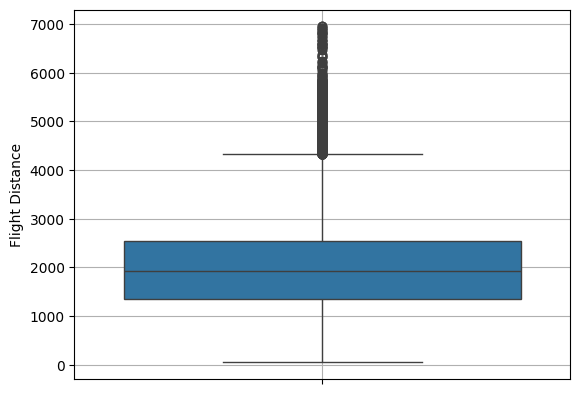

In [11]:
sns.boxplot(df['Flight Distance'])
plt.grid(True)

<Axes: ylabel='Departure Delay in Minutes'>

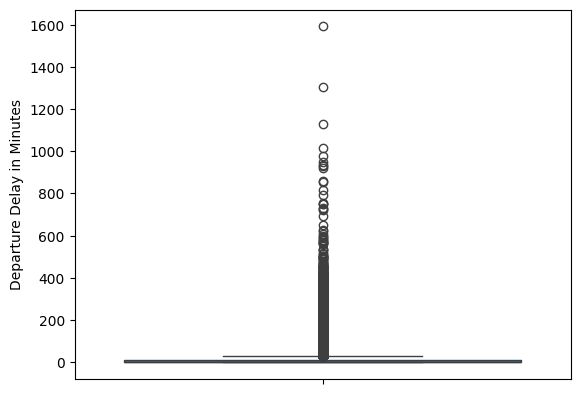

In [12]:
sns.boxplot(df['Departure Delay in Minutes'])

In [13]:
# sns.countplot(df['Seat comfort'])

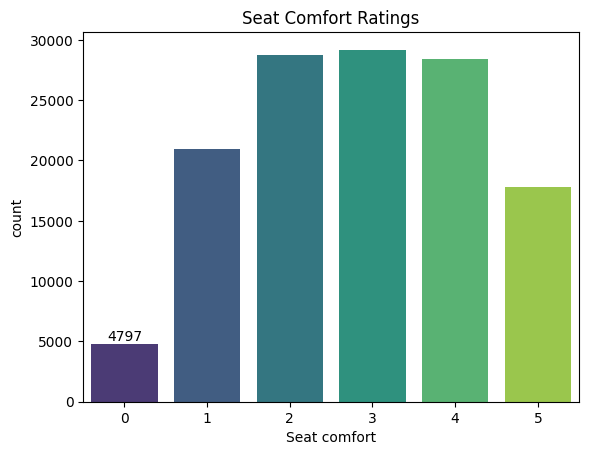

In [14]:
ax = sns.countplot(x = df['Seat comfort'],palette="viridis")
ax.bar_label(ax.containers[0])
plt.title('Seat Comfort Ratings');

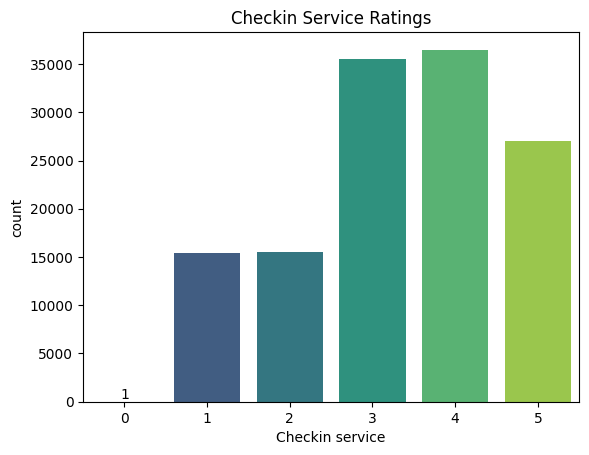

In [15]:
ax = sns.countplot(x = df['Checkin service'],palette="viridis")
ax.bar_label(ax.containers[0])
plt.title('Checkin Service Ratings');

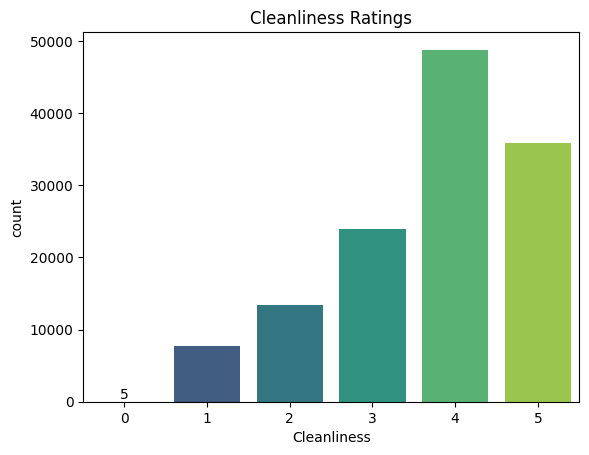

In [16]:
ax = sns.countplot(x = df['Cleanliness'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('Cleanliness Ratings');

In [17]:
df.corr(numeric_only=True)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806


In [18]:
# Classification

In [19]:
# Data Preparation

In [20]:
Le=LabelEncoder()

df['satisfaction']=Le.fit_transform(df['satisfaction'])
df['Customer Type']=Le.fit_transform(df['Customer Type'])
df['Class']=Le.fit_transform(df['Class'])

In [21]:
abs(df.corr(numeric_only=True))['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Customer Type                        0.292592
Class                                0.278932
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Arrival Delay in Minutes             0.080691
Departure Delay in Minutes           0.073909
Flight Distance                      0.039224
Departure/Arrival time convenient    0.015507
Gate location                        0.012071
Name: satisfaction, dtype: float64

In [22]:
# Create a feature matrix 'x' that contains all the independent variables (features) that will be used for modeling, 
# excluding the 'satisfaction','Gender','Age','Gate location','Departure/Arrival time convenient','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes' and 'Type of Travel' columns 
X = df.drop(['satisfaction','Gender','Age','Gate location','Departure/Arrival time convenient','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Type of Travel'],axis = 1)
# The 'axis=1' parameter specifies that the columns should be dropped, rather than rows

# Create a target variable 'y' that will be used as the dependent variable in the modeling process
y=df[['satisfaction']]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
steps=[
    ('scaler',StandardScaler()),
    ('random_classifier',RandomForestClassifier())
]

In [25]:
pipeline=Pipeline(steps)

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_classifier', RandomForestClassifier())])

In [27]:
y_pred=pipeline.predict(X_test)

In [28]:
# Model Evaluation

In [29]:
print(accuracy_score(y_pred,y_test))

0.9443332306744687


In [30]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11757
           1       0.95      0.95      0.95     14219

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



<Axes: >

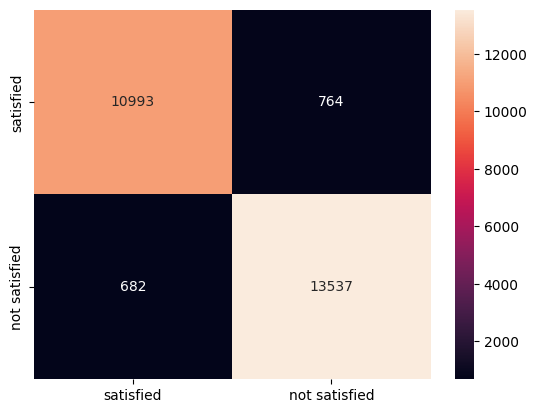

In [31]:
labels=['satisfied','not satisfied']
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)